# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Imports
import numpy as np
import pandas as pd
import csv
import cv2
import matplotlib.gridspec as gridspec
import random
import os
import warnings
from tqdm import tqdm
from skimage import exposure
import csv
from tqdm import tqdm
from skimage import exposure

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_original, y_train_original = train['features'], train['labels']
X_test_original, y_test_original = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

print ('X_train_original shape: ', X_train_original.shape)
print ('y_train_original shape: ', y_train_original.shape)
print ('X_test_original  shape: ', X_test_original.shape)
print ('y_test_original  shape: ', y_test_original.shape)
print ("")
# TODO: Number of training examples
n_train_original = len(X_train_original)

# TODO: Number of testing examples.
n_test_original = len(X_test_original)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_original[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train_original))

print("Number of training examples =", n_train_original)
print("Number of testing examples =", n_test_original)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

X_train_original shape:  (39209, 32, 32, 3)
y_train_original shape:  (39209,)
X_test_original  shape:  (12630, 32, 32, 3)
y_test_original  shape:  (12630,)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [5]:
df = pd.read_csv('signnames.csv')
df

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


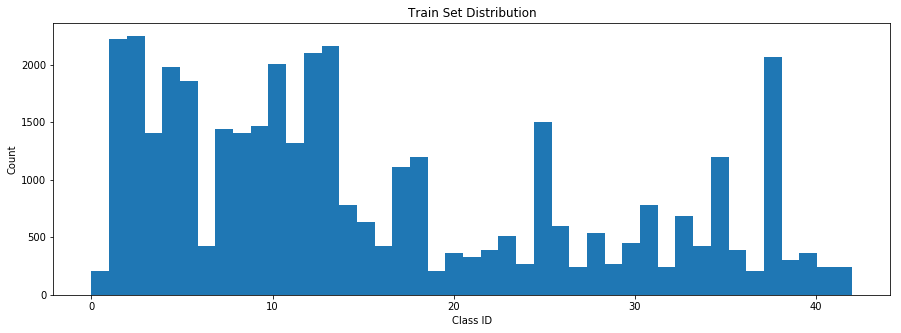

In [6]:
# So, we have 43 unique classes.
# Plot frequency of each class in in train dataset and in test dataset 

plt.figure(figsize=(15,5))
plt.hist(y_train_original, bins=n_classes)
plt.title('Train Set Distribution')
plt.xlabel('Class ID')
plt.ylabel('Count')
plt.show()

In [7]:
# Get all labels in dictionary  [couldn't figure out how index panda's dataframe object the way I wanted to]
label_dict = None
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader, None)
    label_dict = {int(rows[0]):rows[1] for rows in reader}

print(label_dict)

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight o

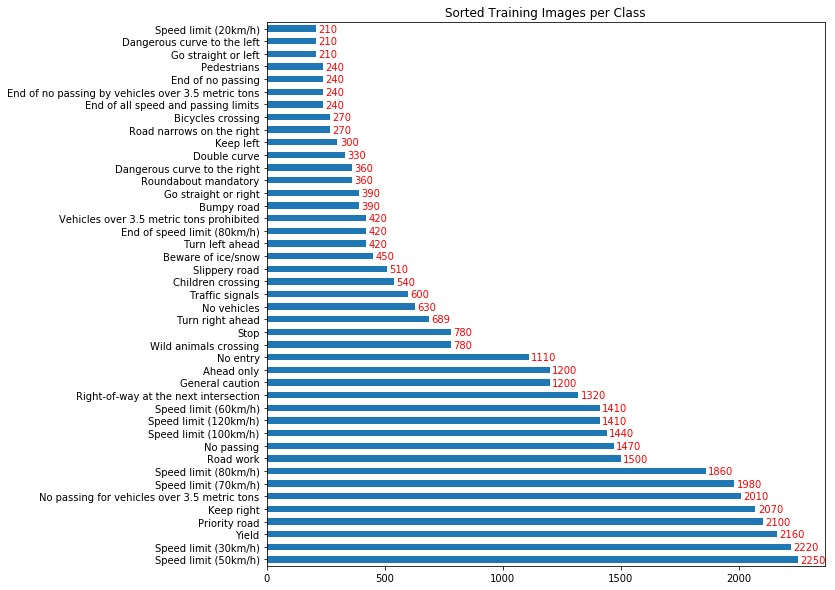

In [8]:
y_train_df = pd.DataFrame()
y_train_df['label'] = y_train_original
ax = y_train_df['label'].value_counts().plot(kind='barh', figsize = (10,10), title='Sorted Training Images per Class')
ax.set_yticklabels(list(map(lambda x: label_dict[x], y_train_df['label'].value_counts().index.tolist())))            
for i, v in enumerate(y_train_df['label'].value_counts()):
    ax.text(v + 10, i - 0.25, str(v), color='red')

/Users/maunesh/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


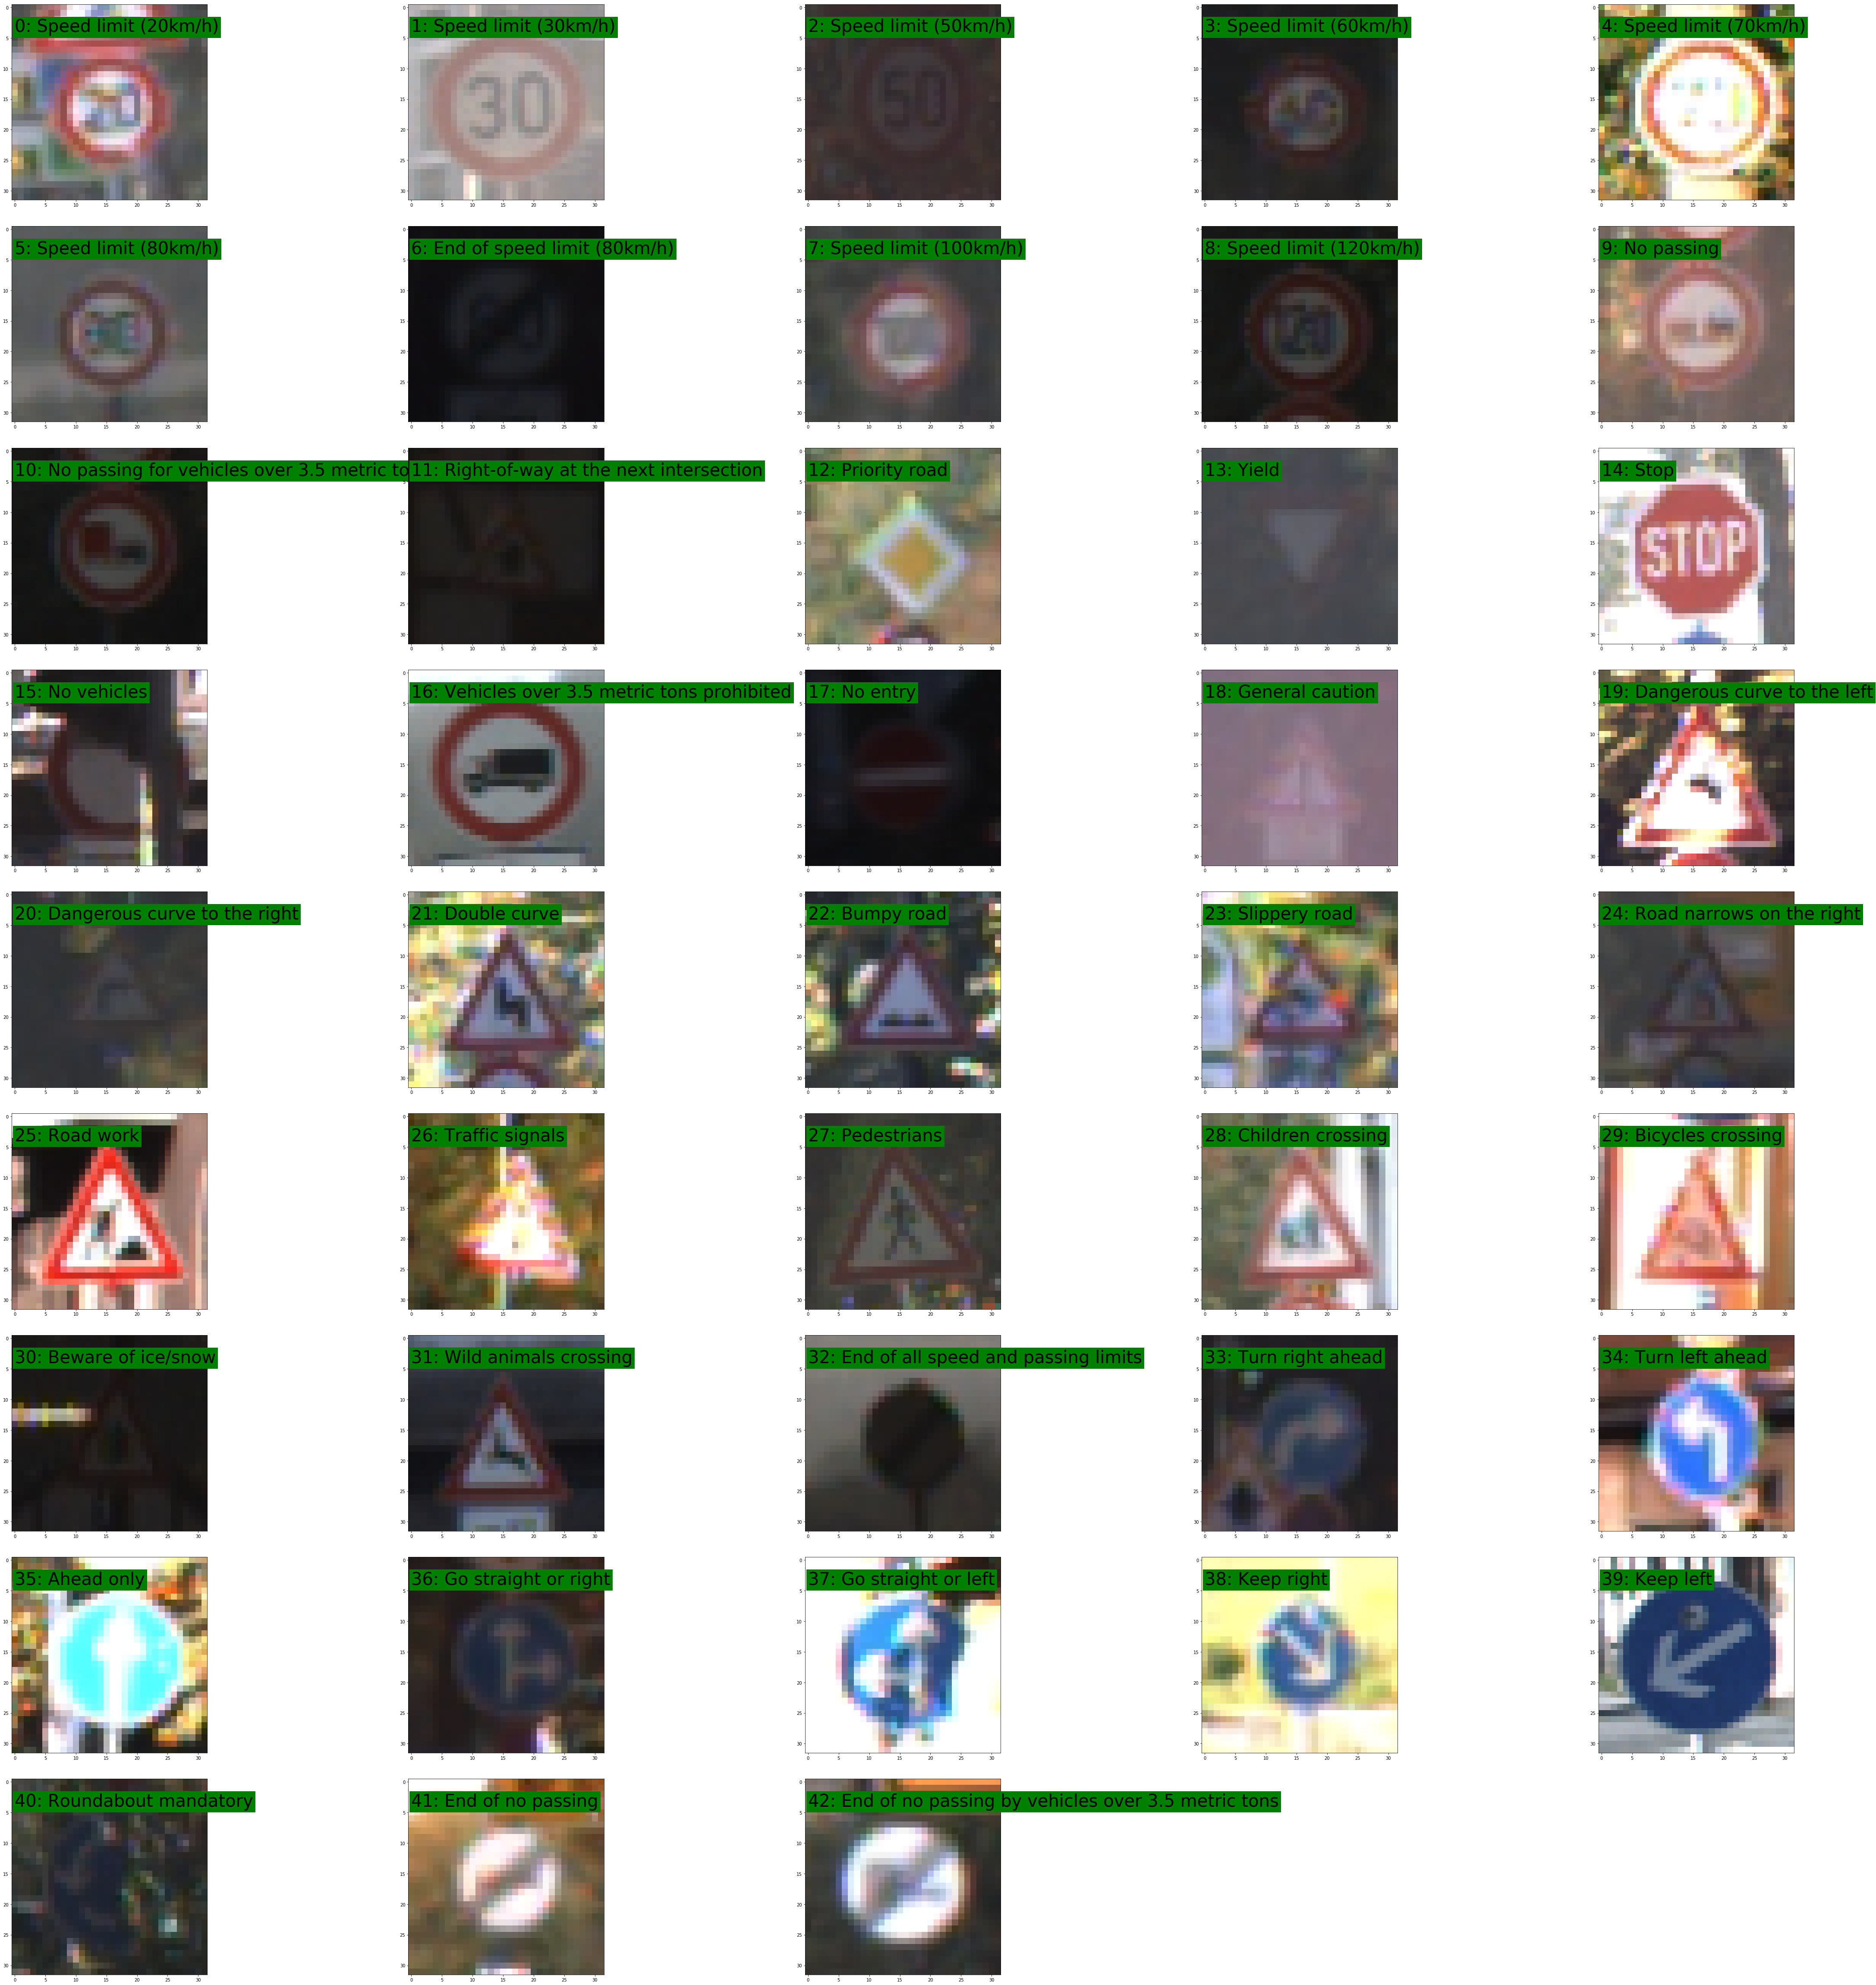

In [9]:
# View one image of each class to understand what images of each class look like, using label dictionary

fig = plt.figure(figsize=(64,64), tight_layout={'h_pad':4})
for i in range(n_classes):
    k = np.where(y_train_original==i)
    img = X_train_original[k[0][0]]
    ax = fig.add_subplot(int(n_classes/5)+1,5,i+1) 
    ax.imshow(img, interpolation='none')
    #ax.set_title(label_dict[y_train[k[0][0]]])
    ax.text(0, 4, '{}: {}'.format(i, label_dict[y_train_original[k[0][0]]]), color='k',backgroundcolor='g', fontsize=40)

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [10]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [11]:
checkpoint1_var = {}
checkpoint1_file = 'data/checkpoint1'
checkpoint1_force = True

checkpoint1_var['n_classes']  = n_classes
checkpoint1_var['label_dict'] = label_dict

### Histogram Equilization
def normalized_image(image_data):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return np.array([exposure.equalize_adapthist(image, clip_limit=0.03) for image in tqdm(image_data)])

if not os.path.isfile(checkpoint1_file) or checkpoint1_force:
    print('Normalizing Training Images...')
    X_train_normalized = normalized_image(X_train_original)
    
    print('\nNormalizing Test Images...')
    X_test_normalized = normalized_image(X_test_original)
    
    checkpoint1_var['X_train_normalized'] = X_train_normalized
    checkpoint1_var['y_train_original'] = y_train_original
    checkpoint1_var['X_test_normalized'] = X_test_normalized
    checkpoint1_var['y_test_original'] = y_test_original

else:
    print('Checkpoint Already Exists. Data would be loaded from checkpoint. Set checkpoint1_force to force new file.')


  0%|          | 11/39209 [00:00<06:17, 103.75it/s]

Normalizing Training Images...


  0%|          | 12/12630 [00:00<01:50, 114.35it/s]


Normalizing Test Images...


100%|██████████| 12630/12630 [01:49<00:00, 115.70it/s]


In [12]:
### Storing Varibales for Checkpoint1

if not os.path.isfile(checkpoint1_file) or checkpoint1_force:
    print('Caching variables in pickle file...')
    try:
        with open(checkpoint1_file, 'wb') as pfile:
            pickle.dump(checkpoint1_var, pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', checkpoint1_file, ':', e)
        raise
    print('Data cached in pickle file.')
else:
    print('Pickle file already created. Set checkpoint1_force to force new file.')

Caching variables in pickle file...
Data cached in pickle file.


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

### Answer:

* Pre-processing Technique: 
    Normalized image using adaptive histogram equalization

* Reason:
    The pixel values would be normalized in the range of 0-1 which would help with gradient decent.
Histogram Equalization would reduce the impact of varying contrast and illumination in images and thus make the model more robust to the same.

In [13]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [14]:
import pickle 
checkpoint1_file = 'data/checkpoint1'

with open(checkpoint1_file, 'rb') as pfile:
    pickle_data = pickle.load(pfile)
    for key in pickle_data:
        exec(key + "= pickle_data['" + str(key) + "']")
    del pickle_data
    
checkpoint2_var = {}
checkpoint2_file = 'data/checkpoint2'
checkpoint2_force = False

In [15]:
print ("Original Data:")
print ("X_train_normalized shape = ", X_train_normalized.shape)
print ("y_train_original shape = ", y_train_original.shape)

from sklearn.model_selection import train_test_split

## Splitiing Training Data in Training, Validation, Test
X_train, X_val_test, y_train, y_val_test = train_test_split(
    X_train_normalized,
    y_train_original,
    test_size=0.30,
    random_state=9345,
    stratify=y_train_original
)

X_val, X_test, y_val, y_test = train_test_split(
    X_val_test,
    y_val_test,
    test_size=0.30,
    random_state=9345,
    stratify=y_val_test
)

print ("Split Data:")
print ("---")
print ("X_train_original shape = ", X_train_original.shape)
print ("y_train_original shape = ", y_train_original.shape)
print ("---")
print ("X_train shape = ", X_train.shape)
print ("y_train shape = ", y_train.shape)
print ("---")
print ("X_val shape = ", X_val.shape)
print ("y_val shape = ", y_val.shape)
print ("---")
print ("X_test shape = ", X_test.shape)
print ("y_test shape = ", y_test.shape)
print ("---")
print ("Intermediate variables shape:")
print ("X_val_test shape = ", X_val_test.shape, " (X_val+X_test) ")
print ("y_val_test shape = ", y_val_test.shape, " (y_val+y_test) ")

# deleting after splitting {X|y}_val_test into {X|y}_val and {X|y}_test
del X_val_test
del y_val_test

checkpoint2_var['X_train'] = X_train.astype('float32')
checkpoint2_var['y_train'] = y_train
checkpoint2_var['X_val'] = X_val.astype('float32')
checkpoint2_var['y_val'] = y_val
checkpoint2_var['X_test'] = X_test.astype('float32')
checkpoint2_var['y_test'] = y_test

Original Data:
X_train_normalized shape =  (39209, 32, 32, 3)
y_train_original shape =  (39209,)
Split Data:
---
X_train_original shape =  (39209, 32, 32, 3)
y_train_original shape =  (39209,)
---
X_train shape =  (27446, 32, 32, 3)
y_train shape =  (27446,)
---
X_val shape =  (8234, 32, 32, 3)
y_val shape =  (8234,)
---
X_test shape =  (3529, 32, 32, 3)
y_test shape =  (3529,)
---
Intermediate variables shape:
X_val_test shape =  (11763, 32, 32, 3)  (X_val+X_test) 
y_val_test shape =  (11763,)  (y_val+y_test) 


In [16]:
import keras
from keras.preprocessing.image import ImageDataGenerator

datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False
)

Using TensorFlow backend.


In [17]:
checkpoint2_force = True

import os
import numpy as np
from tqdm import tqdm
from sklearn.utils import shuffle

total_image_per_class = 5000
X_train_augmented = np.empty((0,32,32,3))
y_train_augmented = np.empty(0,dtype='uint8')

if not os.path.isfile(checkpoint2_file) or checkpoint2_force:
    print('Augmenting Image Data...')
    for i in tqdm(range(n_classes)):
        index = [y_train==i]
        images_for_i_class = X_train[y_train==i]
        y_i_class = y_train[y_train==i]
        
        X_train_augmented_i = np.copy(images_for_i_class)
        y_train_augmented_i = np.copy(y_i_class)
        
        for X,y in datagen.flow(images_for_i_class, y_i_class, batch_size=len(y_i_class), seed=9345+i*37):            
            X_train_augmented_i = np.append(X_train_augmented_i, X, axis=0)
            y_train_augmented_i = np.append(y_train_augmented_i, y, axis=0)
            
            if len(X_train_augmented_i) >= total_image_per_class:
                break

        X_train_augmented = np.append(X_train_augmented, X_train_augmented_i[:5000], axis=0)
        y_train_augmented = np.append(y_train_augmented, y_train_augmented_i[:5000], axis=0)              
else:
    print('Pickle file already created. Set checkpoint2_force to force new file.')

X_train_augmented, y_train_augmented = shuffle(X_train_augmented, y_train_augmented, random_state=9345)

# Storing for checkpoint2
X_train_augmented = X_train_augmented.astype('float32')
checkpoint2_var['X_train_augmented'] = X_train_augmented
checkpoint2_var['y_train_augmented'] = y_train_augmented

  0%|          | 0/43 [00:00<?, ?it/s]

Augmenting Image Data...


100%|██████████| 43/43 [04:02<00:00,  9.55s/it]


In [18]:
checkpoint2_var.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'X_train_augmented', 'y_val', 'y_train_augmented', 'y_test', 'X_val'])

In [19]:
### Storing Varibales for Checkpoint2

import joblib
joblib.dump(checkpoint2_var, checkpoint2_file)

['data/checkpoint2']

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The testing data is kept untouched, and the final model related matrix 
would be reported using this unseen data.

* The training data has been divided as follows:

    * **Training Data:** 70% of original training data had been used for training.
    * **Validation Data:** 21% of original training data. This would be used for checking model performance while training.
    * **Test Data:** (different from provided test data) 
    This would be used to fine tune the model, and check how the model performs on unseen data before running the model on provided test data set.


* The generated additional data is as follows:
    * **Additional Data**: 
        The training data defined above was augmented to obtain 5000 samples per class. 
    The additional data was generated to increase samples for training, which in turn would make training more robust. 
    The newly generated dataset includes normalized original data, and 
    newly generated data (by randomly introducing rotation, x-translation, y-translation, sheer factor and zoom factor to the original data). 
    The new dataset is balanced and had already been pre-processed for normalizing contrast and illumination.

In [ ]:
# XXXX DON'T RUN XXXXX #

import pickle

## Checkpoint1 Variables
checkpoint1_file = 'data/checkpoint1'
with open(checkpoint1_file, 'rb') as pfile:
    pickle_data = pickle.load(pfile)
    for key in pickle_data:
        exec(key + "= pickle_data['" + str(key) + "']")
    del pickle_data

## Checkpoint2 Variables
import joblib
checkpoint2_file = 'data/checkpoint2'
pickle_data = joblib.load(checkpoint2_file)
for key in pickle_data:
    exec(key + "= pickle_data['" + str(key) + "']")
del pickle_data

In [20]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [37]:
# Neural Network
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def conv2d(x, W, b, strides, padding):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k, padding):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding=padding)

def LeNet(x):
    
    # Input = 32x32x3
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    #x_gray = tf.image.rgb_to_grayscale(x)
    
    ### Layer 1:
    # Convolutional. Output = 28x28x6
    # Pooling. Output = 14x14x6
    W1 = tf.Variable(tf.truncated_normal([5, 5, 3, 6], mean = mu, stddev = sigma), name='W1')
    b1 = tf.Variable(tf.zeros(6), name='b1')
    layer1 = conv2d(x, W1, b1, 1, 'VALID')
    pool1 = tf.nn.dropout(maxpool2d(layer1, 2, 'VALID'), keep_prob_conv)

    ### Layer 2:
    # Convolutional: Output = 10x10x16
    # Pooling. Output = 5x5x16
    W2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu, stddev = sigma), name='W2')
    b2 = tf.Variable(tf.zeros(16), name='b2')
    layer2 = conv2d(pool1, W2, b2, 1, 'VALID')
    pool2 = tf.nn.dropout(maxpool2d(layer2, 2, 'VALID'), keep_prob_conv)
    
    ### Layer 3:
    # Fully Connected. Output = 120
    fc = flatten(pool2)
    W_fc1 = tf.Variable(tf.truncated_normal([400, 120], mean = mu, stddev = sigma), name='W_fc1')
    b_fc1 = tf.Variable(tf.zeros(120), name='b_fc1')
    fc1 = tf.nn.relu(tf.add(tf.matmul(fc, W_fc1), b_fc1))
    fc1_drop = tf.nn.dropout(fc1, keep_prob)

    ### Layer 4
    # Fully Connected. Output = 84
    W_fc2 = tf.Variable(tf.truncated_normal([120, 84], mean = mu, stddev = sigma), name='W_fc2')
    b_fc2 = tf.Variable(tf.zeros(84), name='b_fc2')
    fc2 = tf.nn.relu(tf.add(tf.matmul(fc1_drop, W_fc2), b_fc2))
    fc2_drop = tf.nn.dropout(fc2, keep_prob)
    
    ### Layer 5
    # Fully Connected. Output = n_classes
    W_fc3 = tf.Variable(tf.truncated_normal([84, 43], mean = mu, stddev = sigma), name='W_fc3')
    b_fc3 = tf.Variable(tf.zeros(43), name='b_fc3')
    logits = tf.add(tf.matmul(fc2_drop, W_fc3), b_fc3)
    
    return logits


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Modified LeNet Architecture
Input (32x32x3) -> Convolutional 5x5x6 -> ReLu -> MaxPool (stride of 2) -> Convolutional 5x5x16 -> ReLu -> MaxPool (stride of 2) -> Flatten (400) -> Fully Connected (120 units) -> Fully Connected (84 units) -> Fully Connected (43 units, output)
The above code block have been commented and shows how the shape of the data varies across the layers.

In [38]:
# Features & lables 
# x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob_conv = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [39]:
# Loss Function & Learning Parameters
# Create a training pipeline that uses the model to classify the data.

rate = 0.001
BATCH_SIZE = 128
EPOCHS = 30

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [40]:
# Model Evaluation
# Evaluate how well the loss and accuracy of the model for a given dataset.

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1, keep_prob_conv:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [41]:
### Train your model here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from tqdm import tqdm

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    #loader = tf.train.import_meta_graph('lenet_gray.meta')
    #loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    num_examples = len(X_train_augmented)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        print("EPOCH " + str(i+1))
        X_train, y_train = shuffle(X_train_augmented, y_train_augmented)
        for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1, keep_prob_conv:1})
            #break
         
        training_accuracy = evaluate(X_train_augmented, y_train_augmented)
        validation_accuracy = evaluate(X_val, y_val)
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        #break
    
    import os
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    save_path='saved_model/model'
    if not os.path.isabs(save_path):
        save_path = os.path.abspath(os.path.join(os.getcwd(), save_path))
    saver.save(sess, save_path)
    print("Model saved")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


Training...

EPOCH 1


100%|██████████| 1680/1680 [02:03<00:00, 11.14it/s]


Training Accuracy = 0.856
Validation Accuracy = 0.922

EPOCH 2


100%|██████████| 1680/1680 [01:53<00:00, 16.11it/s]


Training Accuracy = 0.922
Validation Accuracy = 0.952

EPOCH 3


100%|██████████| 1680/1680 [02:05<00:00, 13.42it/s]


Training Accuracy = 0.951
Validation Accuracy = 0.977

EPOCH 4


100%|██████████| 1680/1680 [01:55<00:00, 14.57it/s]


Training Accuracy = 0.957
Validation Accuracy = 0.980

EPOCH 5


100%|██████████| 1680/1680 [01:53<00:00, 14.80it/s]


Training Accuracy = 0.970
Validation Accuracy = 0.984

EPOCH 6


100%|██████████| 1680/1680 [01:56<00:00, 14.37it/s]


Training Accuracy = 0.975
Validation Accuracy = 0.983

EPOCH 7


100%|██████████| 1680/1680 [01:51<00:00, 15.10it/s]


Training Accuracy = 0.975
Validation Accuracy = 0.983

EPOCH 8


100%|██████████| 1680/1680 [01:51<00:00, 15.09it/s]


Training Accuracy = 0.973
Validation Accuracy = 0.982

EPOCH 9


100%|██████████| 1680/1680 [01:55<00:00, 14.57it/s]


Training Accuracy = 0.987
Validation Accuracy = 0.989

EPOCH 10


100%|██████████| 1680/1680 [02:01<00:00, 13.78it/s]


Training Accuracy = 0.987
Validation Accuracy = 0.987

EPOCH 11


100%|██████████| 1680/1680 [01:50<00:00, 15.24it/s]


Training Accuracy = 0.988
Validation Accuracy = 0.989

EPOCH 12


100%|██████████| 1680/1680 [01:58<00:00, 14.22it/s]


Training Accuracy = 0.987
Validation Accuracy = 0.990

EPOCH 13


100%|██████████| 1680/1680 [01:58<00:00, 14.17it/s]


Training Accuracy = 0.989
Validation Accuracy = 0.990

EPOCH 14


100%|██████████| 1680/1680 [02:06<00:00, 14.51it/s]


Training Accuracy = 0.984
Validation Accuracy = 0.990

EPOCH 15


100%|██████████| 1680/1680 [01:57<00:00, 14.24it/s]


Training Accuracy = 0.985
Validation Accuracy = 0.988

EPOCH 16


100%|██████████| 1680/1680 [02:08<00:00, 13.04it/s]


Training Accuracy = 0.991
Validation Accuracy = 0.991

EPOCH 17


100%|██████████| 1680/1680 [02:24<00:00, 11.67it/s]


Training Accuracy = 0.991
Validation Accuracy = 0.992

EPOCH 18


100%|██████████| 1680/1680 [02:22<00:00, 11.80it/s]


Training Accuracy = 0.992
Validation Accuracy = 0.991

EPOCH 19


100%|██████████| 1680/1680 [02:20<00:00, 11.95it/s]


Training Accuracy = 0.993
Validation Accuracy = 0.991

EPOCH 20


100%|██████████| 1680/1680 [01:56<00:00, 14.43it/s]


Training Accuracy = 0.992
Validation Accuracy = 0.991

EPOCH 21


100%|██████████| 1680/1680 [01:54<00:00, 14.64it/s]


Training Accuracy = 0.994
Validation Accuracy = 0.991

EPOCH 22


100%|██████████| 1680/1680 [02:13<00:00, 13.45it/s]


Training Accuracy = 0.993
Validation Accuracy = 0.991

EPOCH 23


100%|██████████| 1680/1680 [02:04<00:00, 13.53it/s]


Training Accuracy = 0.993
Validation Accuracy = 0.989

EPOCH 24


100%|██████████| 1680/1680 [02:31<00:00, 11.06it/s]


Training Accuracy = 0.991
Validation Accuracy = 0.989

EPOCH 25


100%|██████████| 1680/1680 [02:31<00:00, 10.43it/s]


Training Accuracy = 0.991
Validation Accuracy = 0.990

EPOCH 26


100%|██████████| 1680/1680 [02:09<00:00, 12.93it/s]


Training Accuracy = 0.990
Validation Accuracy = 0.989

EPOCH 27


100%|██████████| 1680/1680 [02:25<00:00, 11.53it/s]


Training Accuracy = 0.994
Validation Accuracy = 0.989

EPOCH 28


100%|██████████| 1680/1680 [02:12<00:00, 12.65it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.992

EPOCH 29


100%|██████████| 1680/1680 [02:14<00:00, 12.53it/s]


Training Accuracy = 0.991
Validation Accuracy = 0.988

EPOCH 30


100%|██████████| 1680/1680 [02:19<00:00, 13.74it/s]


Training Accuracy = 0.991
Validation Accuracy = 0.990

Model saved
Test Accuracy = 0.992


### Calculating Model Accuracy on Provided Test Data:

In [42]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('saved_model/model.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./saved_model/'))

    test_accuracy = evaluate(X_test_normalized, y_test_original)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.957


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

* AdamOptimizer for managing learning rate
* Batch Size: 128
* Epochs: 20
* Variables initialized with normal distribution (mean=0, std dev=0.1)
* Biases initialized with zeros


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

* Preproceesed data by applying adaptive histogram equalization to make training immune to varying contrast and illumination.
* Augmented training data by randomly introducing rotation, horizontal and vertical shift, and scaling.
* Trained with LeNet Architecture as the problem description is similar to image classification problem on which LeNet was applied. The model had been tweaked to handle RGB channel and 43 output classes. Dropouts were not introduced as the model did not overfit.
* Decided batch size and epoch by using generated validation and test set

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [43]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


/Users/maunesh/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


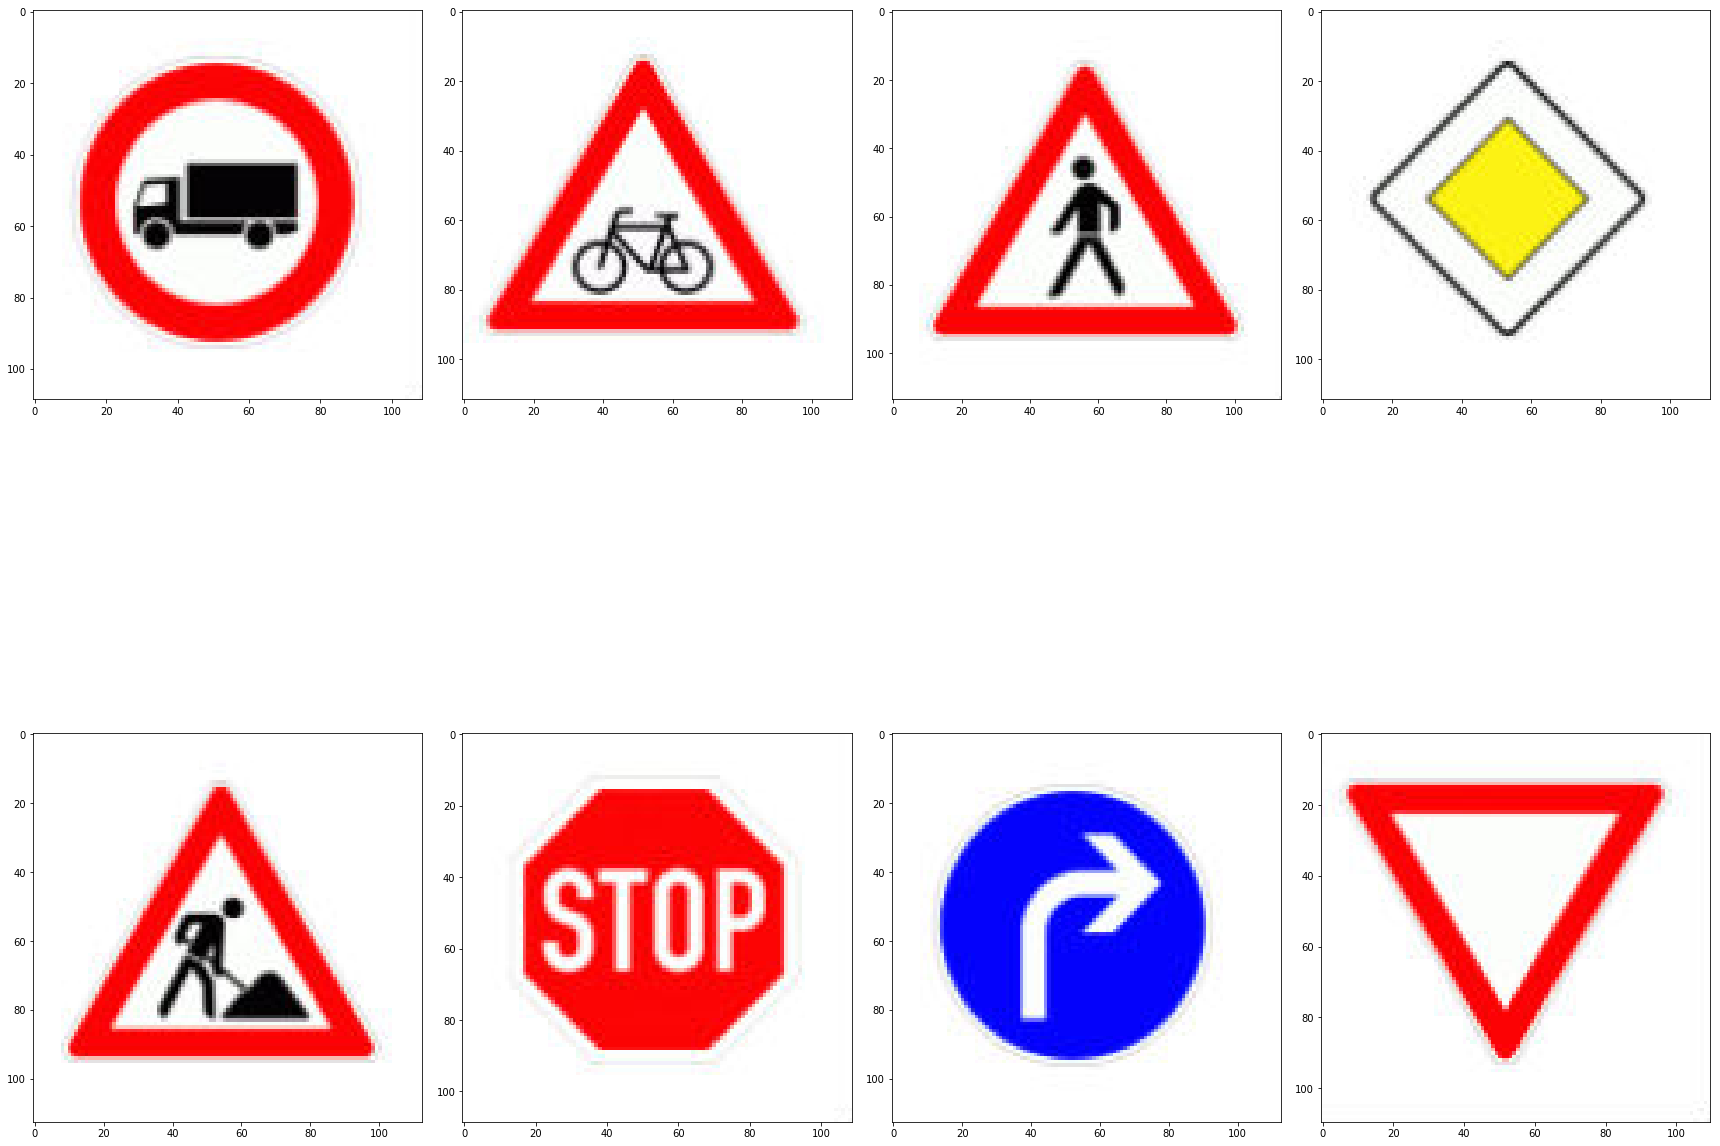

In [58]:
import os

fig = plt.figure(figsize=(24,24), tight_layout={'h_pad':2})
i = 0
for file in os.listdir('test_images'):
    if '.jpg' in file:
        ax = fig.add_subplot(2,4,i+1) 
        img = mpimg.imread('test_images/' + file)
        ax.imshow(img)
        i+=1
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The images were taken from this [PDF](http://www.adcidl.com/pdf/Germany-Road-Traffic-Signs.pdf). As the images are of Germany Traffic Sign itself, it should not be difficult for model to predict.



In [59]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

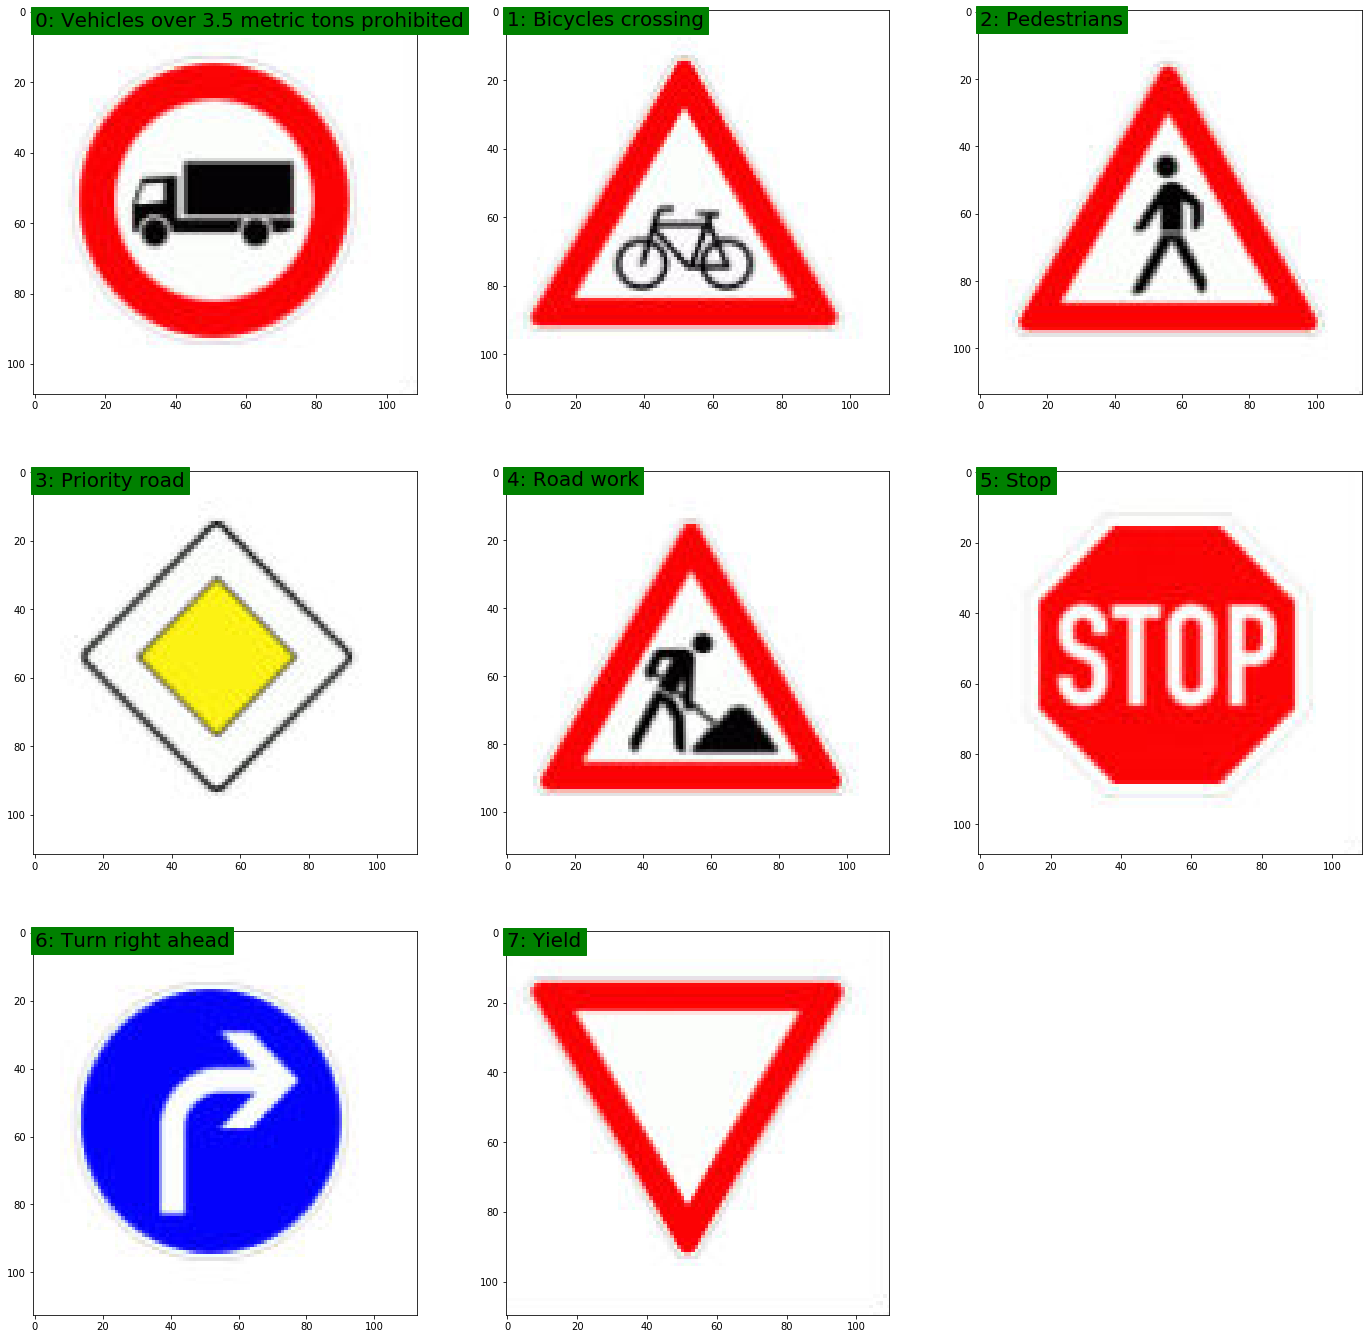

In [66]:
##### import os, sys
import numpy as np
from PIL import Image
import warnings
from skimage import exposure

### Histogram Equilization
def normalized_image(image_data):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return np.array([exposure.equalize_adapthist(image, clip_limit=0.03) for image in image_data])

size = 32, 32
logit = None

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('saved_model/model.meta')
    loader.restore(sess, tf.train.latest_checkpoint('saved_model/'))
    sess = tf.get_default_session()
    
    
    fig = plt.figure(figsize=(24,24))
    i = 0
    for file in os.listdir('test_images'):
        if '.jpg' in file:
            im = Image.open('test_images/' + file)
            im.thumbnail(size, Image.ANTIALIAS)
            im_normalized = normalized_image(np.array([np.array(im)]))
            logit = sess.run(tf.argmax(logits, 1), feed_dict={x:im_normalized, keep_prob:1.0, keep_prob_conv:1})
            ax = fig.add_subplot(3,3,i+1)
            img = mpimg.imread('test_images/' + file)
            ax.imshow(img, interpolation='none')
            ax.text(0, 4, '{}: {}'.format(i, label_dict[logit[0]]), color='k',backgroundcolor='g', fontsize=20)
            i+=1
    plt.show()

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model is able to predict correctly on newly provided images with accuracy of 100%.

In [67]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

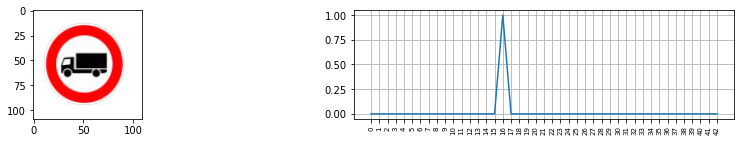

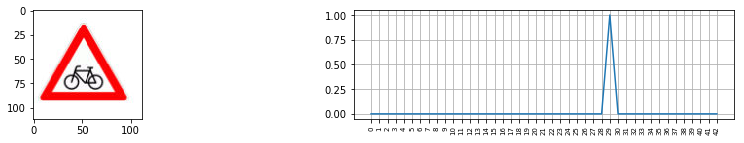

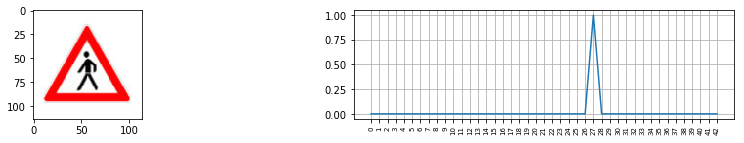

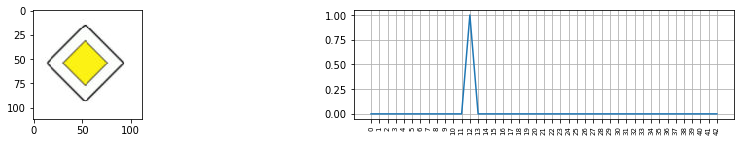

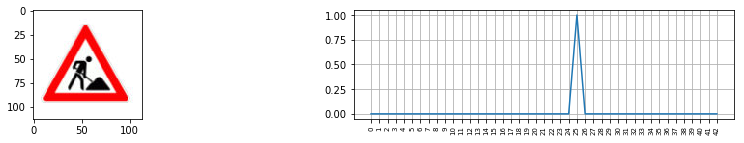

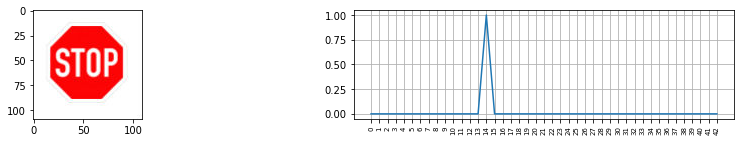

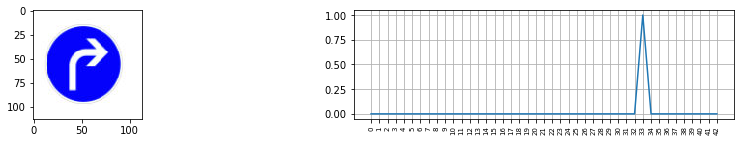

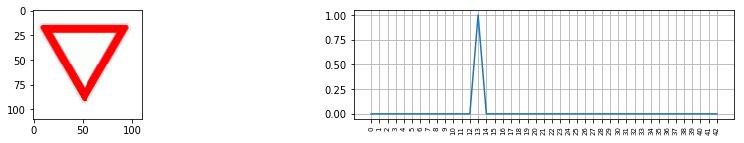

In [68]:
import os, sys
import numpy as np
from PIL import Image
import warnings
from skimage import exposure
import pandas as pd

### Histogram Equilization
def normalized_image(image_data):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return np.array([exposure.equalize_adapthist(image, clip_limit=0.03) for image in image_data])

size = 32, 32
softmax_prob = None

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('saved_model/model.meta')
    loader.restore(sess, tf.train.latest_checkpoint('saved_model/'))
    sess = tf.get_default_session()
    
    i = 0
    for file in os.listdir('test_images'):
        if '.jpg' in file:
            im = Image.open('test_images/' + file)
            im.thumbnail(size, Image.ANTIALIAS)
            im_normalized = normalized_image(np.array([np.array(im)]))
            softmax_prob = sess.run(tf.nn.softmax(logits), feed_dict={x:im_normalized, keep_prob:1.0, keep_prob_conv:1})
            fig = plt.figure(figsize=(15,2))
            ax = fig.add_subplot(1,2,1) 
            img = mpimg.imread('test_images/' + file)
            ax.imshow(img)
            
            ax = fig.add_subplot(1,2,2) 
            ax.set_xticks(np.arange(0,43,1))
            plt.plot(softmax_prob[0])
            for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize('x-small') 
                tick.label.set_rotation('vertical')
            plt.grid()
            plt.show()

In [69]:
for key in label_dict.keys():
    print(str(key) + " :\t" + label_dict[key])

0 :	Speed limit (20km/h)
1 :	Speed limit (30km/h)
2 :	Speed limit (50km/h)
3 :	Speed limit (60km/h)
4 :	Speed limit (70km/h)
5 :	Speed limit (80km/h)
6 :	End of speed limit (80km/h)
7 :	Speed limit (100km/h)
8 :	Speed limit (120km/h)
9 :	No passing
10 :	No passing for vehicles over 3.5 metric tons
11 :	Right-of-way at the next intersection
12 :	Priority road
13 :	Yield
14 :	Stop
15 :	No vehicles
16 :	Vehicles over 3.5 metric tons prohibited
17 :	No entry
18 :	General caution
19 :	Dangerous curve to the left
20 :	Dangerous curve to the right
21 :	Double curve
22 :	Bumpy road
23 :	Slippery road
24 :	Road narrows on the right
25 :	Road work
26 :	Traffic signals
27 :	Pedestrians
28 :	Children crossing
29 :	Bicycles crossing
30 :	Beware of ice/snow
31 :	Wild animals crossing
32 :	End of all speed and passing limits
33 :	Turn right ahead
34 :	Turn left ahead
35 :	Ahead only
36 :	Go straight or right
37 :	Go straight or left
38 :	Keep right
39 :	Keep left
40 :	Roundabout mandatory
41 :	End of

In [71]:
# Calculating statics on the test set data
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [73]:
y_pred = None
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('saved_model/model.meta')
    loader.restore(sess, tf.train.latest_checkpoint('saved_model/'))
    sess = tf.get_default_session()
    y_pred = sess.run(tf.argmax(logits, 1), feed_dict={x:X_test_normalized, keep_prob:1.0, keep_prob_conv:1})

Confusion matrix, without normalization


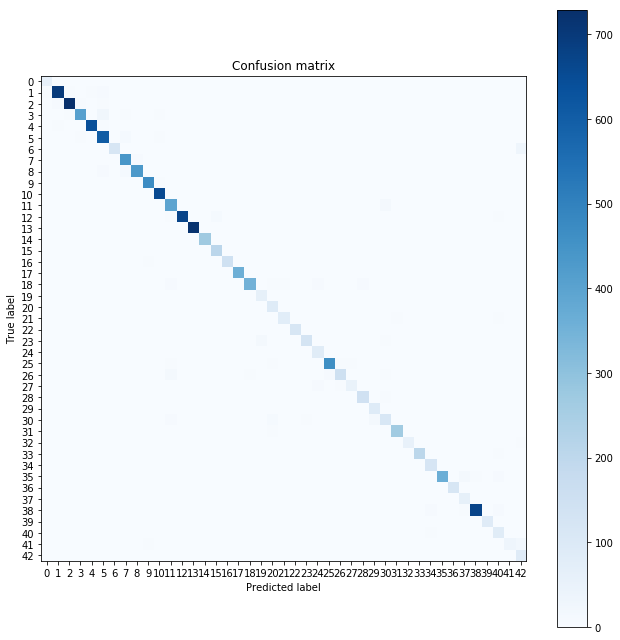

In [75]:
## Finding classes which where wrongly predicted
classes = [i for i in range(n_classes)]
plt.figure(figsize=(9,9))
plot_confusion_matrix(confusion_matrix(y_test_original, y_pred), classes, normalize=False)

From the above confusion matrix, we can see that class 11 has been wrongly predicted as class 30 many times. 

Right-of-way at the next intersection


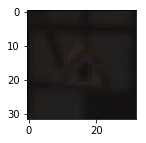

In [94]:
fig = plt.figure(figsize=(2,2))
idx = np.where(y_train_original==11)
img = X_train_original[idx[0][0]]
plt.imshow(img)
print (label_dict[11])

Beware of ice/snow


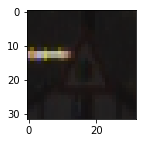

In [95]:
fig = plt.figure(figsize=(2,2))
idx = np.where(y_train_original==30)
img = X_train_original[idx[0][0]]
plt.imshow(img)
print (label_dict[30])

We can see that the images are actually quite similar

In [96]:
class_11 = np.where(y_test_original==11)
y_class_11_pred = y_pred[class_11]
X_class_11_samples = X_test_normalized[class_11]

class_11_predicted_as_class_30 = np.where(y_class_11_pred==30)
X_class_11_samples_predicted_as_class_30 = X_class_11_samples[class_11_predicted_as_class_30]

In [98]:
## Finding top-5 classes for incorrect predictions

y_top_5 = None
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('saved_model/model.meta')
    loader.restore(sess, tf.train.latest_checkpoint('saved_model/'))
    sess = tf.get_default_session()
    
    for X_incorrect in X_class_11_samples_predicted_as_class_30:
        y_top_5 = sess.run(tf.nn.top_k(logits, k=3), feed_dict={x:[X_incorrect], keep_prob:1.0, keep_prob_conv:1})
        print(y_top_5.indices)

[[30 11 31]]
[[30 11 21]]
[[30 11 23]]
[[30 11 27]]
[[30 28 11]]
[[30 23 21]]
[[30 23 11]]
[[30 11 21]]
[[30 11 25]]
[[30 11 28]]
[[30 11 21]]
[[30 28 11]]
[[30 11 31]]
[[30 11 23]]
[[30 11 21]]


In [99]:
# Repeating for all incorrect predictions
X_test_incorrect_pred = X_test_normalized[y_pred != y_test_original]
y_true_incorrect_pred = y_test_original[y_pred != y_test_original]

in_top_3 = None
in_top_5 = None
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('saved_model/model.meta')
    loader.restore(sess, tf.train.latest_checkpoint('saved_model/'))
    sess = tf.get_default_session()
    
    in_top_3 = sess.run(tf.nn.in_top_k(logits, y_true_incorrect_pred, 3), feed_dict={x:X_test_incorrect_pred, keep_prob:1.0, keep_prob_conv:1})
    in_top_5 = sess.run(tf.nn.in_top_k(logits, y_true_incorrect_pred, 5), feed_dict={x:X_test_incorrect_pred, keep_prob:1.0, keep_prob_conv:1})

In [100]:
## Total Incorrect Count
print (len(X_test_incorrect_pred))

545


In [101]:
## Incorrect Prediction but correctly predicted in Top 3
len(in_top_3[in_top_3==True])

425

In [102]:
## Incorrect Prediction but correctly predicted in Top 5
len(in_top_5[in_top_5==True])

485

In [104]:
# Calculating top n accuracy
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('saved_model/model.meta')
    loader.restore(sess, tf.train.latest_checkpoint('saved_model/'))
    sess = tf.get_default_session()
    
    in_top_3 = sess.run(tf.nn.in_top_k(logits, y_test_original, 3), feed_dict={x:X_test_normalized, keep_prob:1.0, keep_prob_conv:1})
    in_top_5 = sess.run(tf.nn.in_top_k(logits, y_test_original, 5), feed_dict={x:X_test_normalized, keep_prob:1.0, keep_prob_conv:1})

### Top 3 accuracy 

In [106]:
100.0 * len(in_top_3[in_top_3==True])/len(y_test_original)

99.04988123515439

### Top 5 accuracy

In [108]:
100.0 * len(in_top_5[in_top_5==True])/len(y_test_original)

99.5249406175772

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [109]:
for i in range(n_classes):
    cm = confusion_matrix(y_test_original, y_pred)
    cm_t = np.transpose(cm)
    total_true_count = np.sum(y_test_original==i)
    total_true_pred = cm[i][i]
    precision = total_true_pred / np.sum(cm_t[i].ravel())
    cm[i][i] = 0
    maximum_misclassified_as = np.argmax(cm[i])
    percentage_classification_max_confusion = cm[i][maximum_misclassified_as] / total_true_count * 100
    
    print("Class %s:" % label_dict[i])
    print("  Accuracy = {:.2f}%".format(total_true_pred/total_true_count*100))
    print("  Precision = {:.2f}%".format(precision*100))
    
    if (cm[i][maximum_misclassified_as] != 0):
        print("  Maximum Misclassified as: %s" % label_dict[maximum_misclassified_as])
        print("  Misclassification Percentage for above class: {:.2f}%".format(percentage_classification_max_confusion))
    
    print()

Class Speed limit (20km/h):
  Accuracy = 96.67%
  Precision = 93.55%
  Maximum Misclassified as: Speed limit (30km/h)
  Misclassification Percentage for above class: 3.33%

Class Speed limit (30km/h):
  Accuracy = 96.81%
  Precision = 97.76%
  Maximum Misclassified as: Speed limit (80km/h)
  Misclassification Percentage for above class: 1.11%

Class Speed limit (50km/h):
  Accuracy = 97.20%
  Precision = 97.46%
  Maximum Misclassified as: Speed limit (30km/h)
  Misclassification Percentage for above class: 0.80%

Class Speed limit (60km/h):
  Accuracy = 90.67%
  Precision = 97.37%
  Maximum Misclassified as: Speed limit (80km/h)
  Misclassification Percentage for above class: 5.56%

Class Speed limit (70km/h):
  Accuracy = 97.12%
  Precision = 99.07%
  Maximum Misclassified as: Speed limit (30km/h)
  Misclassification Percentage for above class: 0.76%

Class Speed limit (80km/h):
  Accuracy = 95.87%
  Precision = 92.21%
  Maximum Misclassified as: Speed limit (100km/h)
  Misclassificat

**Answer:**

The model has top-5 accuracy of 99.46%, and top-3 accuracy of 98.78%. 
Also, the model has accuracy and precision greater than 90% for most of the classes. 
The confusion matrix for the model is drawn below.

The model misclassifies class like:
- End of no passing by vehicles over 3.5 metric tons and End of no passing
- Children Crossing and Bicycle Crossing and Pedestrian Crossing
- End of speed limit (80km/h) and Speed limit (80km/h)

Confusion matrix, without normalization


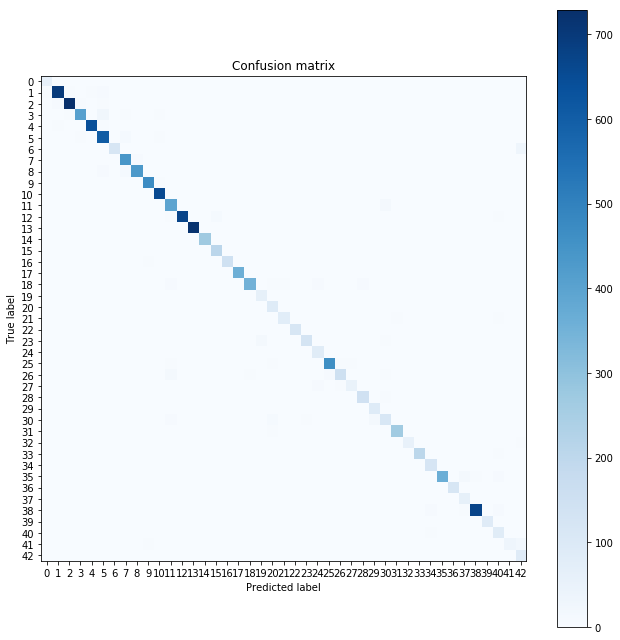

In [110]:
classes = [i for i in range(n_classes)]
plt.figure(figsize=(9,9))
plot_confusion_matrix(confusion_matrix(y_test_original, y_pred), classes, normalize=False)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.